## Class 6

* small project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import datetime

#### Curve fitting

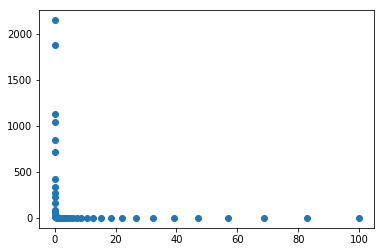

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Seed the random number generator for reproducibility
np.random.seed(12345)

x_data = np.logspace(-2, 2, num=50)
y_data = 2.5 * x_data**(-1.5) * (np.random.normal(size=50) * 0.2 + 0.9)

# And plot it
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
plt.show()

It does not look nice. Our function is
$$ y = b x^{a}$$
Let us take the logarithm of both sides
$$ \log(y)=a \log(x) + \log(b)$$
This is a linear relation betweeh $\log(x)$ and $\log(y)$

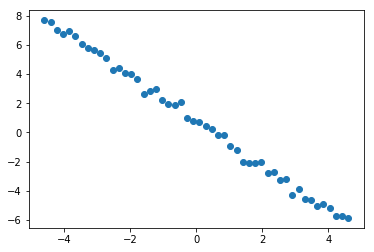

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(np.log(x_data), np.log(y_data))
plt.show()

In [5]:
def test_lin(x, a, b):
    return a * x + b

linfit, params_covariance = optimize.curve_fit(test_lin, np.log(x_data), np.log(y_data),
                                               p0=[2, 2])

print(linfit[0],np.exp(linfit[1]))

-1.5298145261035532 2.148674733501787


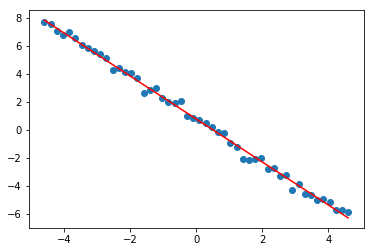

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(np.log(x_data), np.log(y_data))
plt.plot(np.log(x_data),test_lin(np.log(x_data),linfit[0],linfit[1]),'r-')
plt.show()

# Global warming signatures on the temperature data of Stockholm

In [7]:
stockholm = np.genfromtxt('stockholm_temperatures.dat')

####  Create dates list of dates using datetime

In [8]:
date_format = "%Y-%m-%d"
dates = []



In [9]:
stockholm

array([[ 1.800e+03,  1.000e+00,  1.000e+00, -6.100e+00],
       [ 1.800e+03,  1.000e+00,  2.000e+00, -1.540e+01],
       [ 1.800e+03,  1.000e+00,  3.000e+00, -1.500e+01],
       ...,
       [ 2.011e+03,  1.200e+01,  2.900e+01,  4.900e+00],
       [ 2.011e+03,  1.200e+01,  3.000e+01,  6.000e-01],
       [ 2.011e+03,  1.200e+01,  3.100e+01, -2.600e+00]])

In [10]:
s_datetime = [datetime.datetime.strptime(str(int(stockholm[i,0])) + "-" + str(int(stockholm[i,1])) +"-" + str(int(stockholm[i,2])), date_format) for i in range(stockholm.shape[0])]

In [11]:
s_datetime[:3]

[datetime.datetime(1800, 1, 1, 0, 0),
 datetime.datetime(1800, 1, 2, 0, 0),
 datetime.datetime(1800, 1, 3, 0, 0)]

#### Create a scatterplot from the temperatures

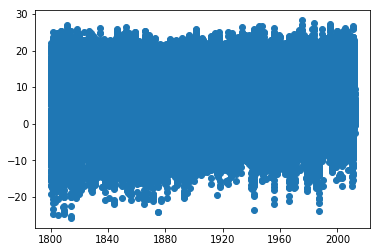

In [12]:
x_data = s_datetime
y_data = stockholm[: , 3]

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
plt.show()

#### Fit a linear to the raw data. You can use a simple range az x axes
Question: Do you see the global warming?

In [13]:
def test_lin(x, a, b):
    return a * x + b

linfit, params_covariance = optimize.curve_fit(test_lin, range(len(x_data)), y_data,
                                               p0=[2, 2])

print(linfit[0],(linfit[1]))


2.71663032207492e-05 5.14536609700584


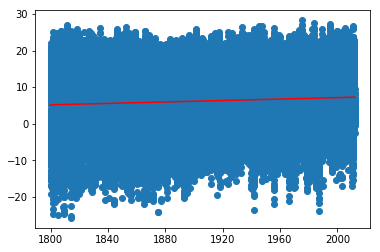

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
plt.plot((x_data),test_lin(range(len(x_data)),linfit[0],linfit[1]),'r-')
plt.show()

#### Calculate the temperature increase for ten years (a year has in average 365.25 days)

In [15]:
linfit[0] * 365.25 * 10

0.09922492251378645

#### Create a list with yearly averages, and then plot it

In [16]:
yearly_avgs = [np.mean(stockholm[stockholm[: , 0] == i, 3]) for i in range(1800, 2012)]

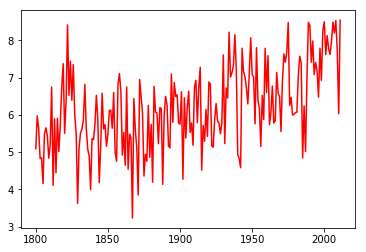

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(range(1800, 2012), yearly_avgs, "r-")
plt.show()

#### Get the positions of the years in the stockholm array
e.g.  yp = \[0, 365, 730, 1095, 1460, 1826, 2191, 2556, 2921, 3287 ...<br>
You will need this to be able to reference the stockholm array by years. E.g.<br>
<pre>
stockholm[yp[i]:yp[i+5]]
</pre>
Will give you the array containing data from year i ro year y+5

In [18]:
yp = [i + 1 for i in range(stockholm.shape[0] - 1) if stockholm[i , 0] != stockholm[i + 1, 0]]
yp = [0] + yp
print(yp)

[0, 365, 730, 1095, 1460, 1826, 2191, 2556, 2921, 3287, 3652, 4017, 4382, 4748, 5113, 5478, 5843, 6209, 6574, 6939, 7304, 7670, 8035, 8400, 8765, 9131, 9496, 9861, 10226, 10592, 10957, 11322, 11687, 12053, 12418, 12783, 13148, 13514, 13879, 14244, 14609, 14975, 15340, 15705, 16070, 16436, 16801, 17166, 17531, 17897, 18262, 18627, 18992, 19358, 19723, 20088, 20453, 20819, 21184, 21549, 21914, 22280, 22645, 23010, 23375, 23741, 24106, 24471, 24836, 25202, 25567, 25932, 26297, 26663, 27028, 27393, 27758, 28124, 28489, 28854, 29219, 29585, 29950, 30315, 30680, 31046, 31411, 31776, 32141, 32507, 32872, 33237, 33602, 33968, 34333, 34698, 35063, 35429, 35794, 36159, 36524, 36889, 37254, 37619, 37984, 38350, 38715, 39080, 39445, 39811, 40176, 40541, 40906, 41272, 41637, 42002, 42367, 42733, 43098, 43463, 43828, 44194, 44559, 44924, 45289, 45655, 46020, 46385, 46750, 47116, 47481, 47846, 48211, 48577, 48942, 49307, 49672, 50038, 50403, 50768, 51133, 51499, 51864, 52229, 52594, 52960, 53325, 536

#### Calculate the average temperatures for the same 30 year periods and plot them

In [19]:
#calculate 7 average temps
y_length = 30
periods = int(len(yp) / y_length)
periods
avg_temps = [np.mean(stockholm[yp[y_length * i]:yp[(y_length * i + y_length - 1)] , 3]) for i in range(periods)]
avg_temps

[5.813283610271903,
 5.634941465256797,
 5.401991881431134,
 6.017495987158909,
 6.434107429434532,
 6.639048338368579,
 7.36164448220523]

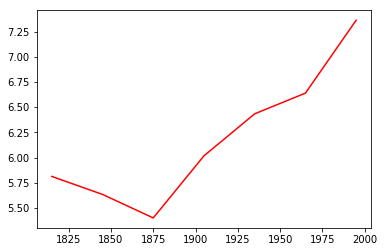

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(1815, 1995, 7), avg_temps, "r-")
plt.show()

#### Some say there are more extremes nowdays. Calculate the temperature variances for the same 30 year periods and plot them

In [21]:
variances = [np.var(stockholm[yp[y_length * i]:yp[(y_length * i + y_length - 1)] , 3]) for i in range(periods)]
variances

[77.85148045657428,
 72.8689499776915,
 67.9721125244314,
 62.69395788816725,
 65.39879042629522,
 65.38047107319211,
 63.67913585888039]

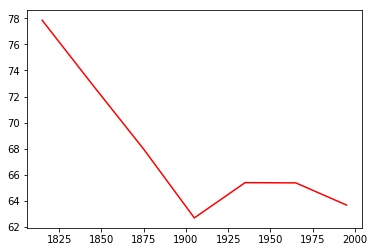

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(1815, 1995, 7), variances, "r-")
plt.show()

#### Calculate linear trend for every 30 year period. You may skip year 2010 and 2011 (7 bins) and plot it

0.27447899678291243 5.362636323094032


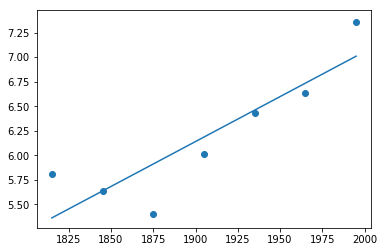

In [23]:
linfit, params_covariance = optimize.curve_fit(test_lin, range(periods), avg_temps,
                                               p0=[2, 2])

print(linfit[0],(linfit[1]))
plt.figure(figsize=(6, 4))
plt.scatter(np.linspace(1815, 1995, 7), avg_temps)
plt.plot(np.linspace(1815, 1995, 7), test_lin(range(periods),linfit[0],linfit[1]))
plt.show()

#### Create the average temperature profile for a year
* Easy?
* What to do with 29th February? Skip it.

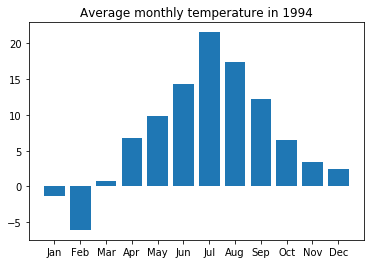

[-1.3548387096774193,
 -6.060714285714285,
 0.8032258064516129,
 6.836666666666665,
 9.896774193548389,
 14.333333333333334,
 21.53225806451613,
 17.319354838709675,
 12.173333333333334,
 6.480645161290322,
 3.45,
 2.387096774193549]

In [24]:
#avg per month
def avg_per_m(year):
    data = stockholm[yp[year - 1800] : yp[year - 1799]]
    monthly = [np.mean(data[data[: , 1] == i, 3]) for i in range(1,13)]
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.bar(months, monthly)
    plt.title('Average monthly temperature in ' + str(year))
    plt.show()
    return monthly
monthly = avg_per_m(1994)
monthly

#### Change numbers to months on x axes
<pre>
mp = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(mp, months)
</pre>
Plot one year's data on top of it

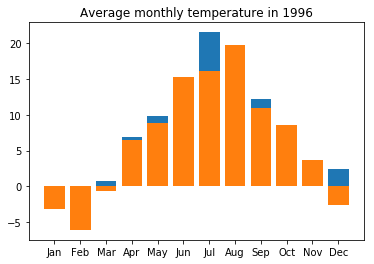

In [38]:
def avg_per_m_2(year1, year2):
    data1 = stockholm[yp[year1 - 1800] : yp[year1 - 1799]]
    data2 = stockholm[yp[year2 - 1800] : yp[year2 - 1799]]
    monthly1 = [np.mean(data1[data1[: , 1] == i, 3]) for i in range(1,13)]
    monthly2 = [np.mean(data2[data2[: , 1] == i, 3]) for i in range(1,13)]
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig, ax = plt.subplots()
    ax.bar(months, monthly1)
    ax.bar(months, monthly2)
    plt.title('Average monthly temperature in ' + str(year))
    plt.show()
    return monthly
monthly = avg_per_m_2(1994, 1996)

#### Create and plot the array which is the deseasonned temperature. Remove the average temperature from the original data (watch out for the leap day, you may leave it to the end of the year)

#### Plot the histogram of the data

#### Calculate the variance and the standard deviation (square root of the variance) for the whole data

#### For normal distribution 95% of the data is within two standard deviations ($\sigma$), i.e.:
$$|x-\bar x|<2\sigma$$
for 95% of the data. Check on the deseasoned data if it is true for the different 30 year periods

#### Check the ratio of the extreme temperatures for positive and negative deviation